# Twitter Sentiment Analysis using NLP

## Internship Task – CODTECH (Task 4)

### Objective
The objective of this project is to perform sentiment analysis on Twitter data using Natural Language Processing (NLP) techniques.

The goal is to:
- Clean and preprocess tweet text
- Convert text into numerical features using TF-IDF
- Train machine learning models
- Evaluate model performance
- Save the trained model for future use

---

### Dataset Columns
- Tweet ID
- Entity
- Sentiment
- Tweet Content

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import re
import string

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model saving
import joblib

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Shourya
[nltk_data]     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shourya
[nltk_data]     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load Dataset

The dataset contains tweets along with sentiment labels.
We load the dataset and inspect its structure.

In [2]:
df = pd.read_csv("twitter_reviews.csv")

# Standardize column names
df.columns = df.columns.str.strip()

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (74682, 4)


,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Exploration

We analyze:
- Dataset structure
- Missing values
- Sentiment distribution

<class 'pandas.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Tweet ID       74682 non-null  int64
 1   Entity         74682 non-null  str  
 2   Sentiment      74682 non-null  str  
 3   Tweet Content  73996 non-null  str  
dtypes: int64(1), str(3)
memory usage: 2.3 MB

Missing Values:
 Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64


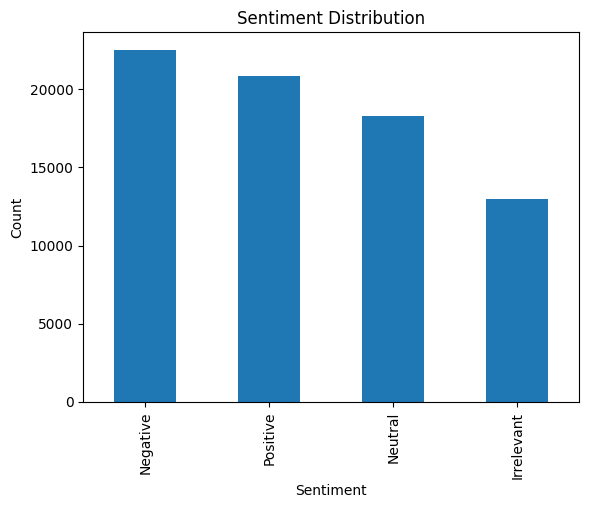

In [3]:
df.info()
print("\nMissing Values:\n", df.isnull().sum())

plt.figure()
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Data Cleaning

Text data contains:
- URLs
- Mentions
- Hashtags
- Punctuation
- Stopwords
- Irrelevant characters

We clean the tweet content to improve model accuracy.

In [4]:
# Rename columns
df = df.rename(columns={
    'Tweet Content': 'text',
    'Sentiment': 'sentiment',
    'Tweet ID' : 'tweet id',
    'Entity' : 'entity'
})

# Remove missing values
df = df.dropna(subset=['text'])

# Convert to string
df['text'] = df['text'].astype(str).str.lower()

# Remove URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove mentions and hashtags
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+|#', '', x))

# Remove punctuation
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(
    lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split())
)

df.head()

,tweet id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting borderland murder
1,2401,Borderlands,Positive,coming border kill
2,2401,Borderlands,Positive,im getting borderland kill
3,2401,Borderlands,Positive,im coming borderland murder
4,2401,Borderlands,Positive,im getting borderland murder


## Feature Engineering using TF-IDF

Machine learning models require numerical input.

TF-IDF (Term Frequency – Inverse Document Frequency)
converts text into weighted numerical features based on word importance.

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (73996, 5000)


## Model Training

We split the dataset into:
- 80% Training Data
- 20% Testing Data

Then train a Logistic Regression model.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Model Evaluation

We evaluate model performance using:
- Accuracy
- Classification Report
- Confusion Matrix

Logistic Regression Accuracy: 0.6737837837837838

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.69      0.48      0.57      2696
    Negative       0.67      0.80      0.73      4380
     Neutral       0.67      0.61      0.64      3605
    Positive       0.67      0.73      0.70      4119

    accuracy                           0.67     14800
   macro avg       0.68      0.65      0.66     14800
weighted avg       0.68      0.67      0.67     14800



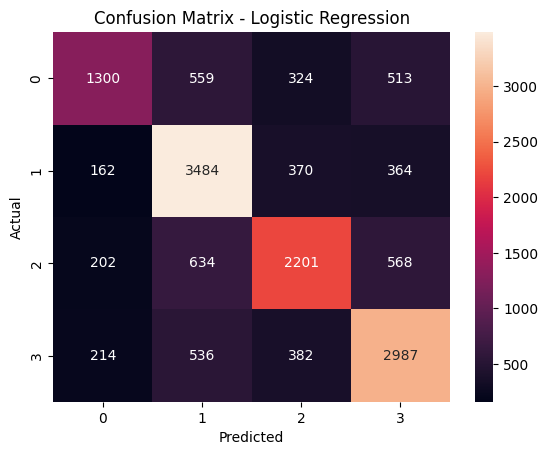

In [7]:
y_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model Comparison

To improve reliability, we also train a Multinomial Naive Bayes model
and compare its performance with Logistic Regression.

In [8]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.6279729729729729


## Model Saving

The trained model and TF-IDF vectorizer are saved using Joblib.

This allows reuse without retraining.

In [9]:
joblib.dump(log_model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and Vectorizer saved successfully.")

Model and Vectorizer saved successfully.


## Conclusion

In this project, we performed sentiment analysis on Twitter data using NLP techniques.

Key Steps:
- Cleaned and preprocessed text data
- Converted text into numerical features using TF-IDF
- Trained Logistic Regression and Naive Bayes models
- Evaluated performance using accuracy and confusion matrix
- Saved trained model for future use

The model successfully classifies tweets into sentiment categories.
This approach can be extended for real-time social media monitoring.